No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[131.56666667 126.66666667 123.6        119.56666667 113.63333333
 109.63333333 106.1        102.5         99.86666667  96.73333333
  93.23333333  90.56666667  88.          85.3         82.96666667
  80.06666667  77.93333333  76.          75.          73.
  70.06666667  68.03333333  66.6         64.9         62.96666667
  63.          61.96666667]


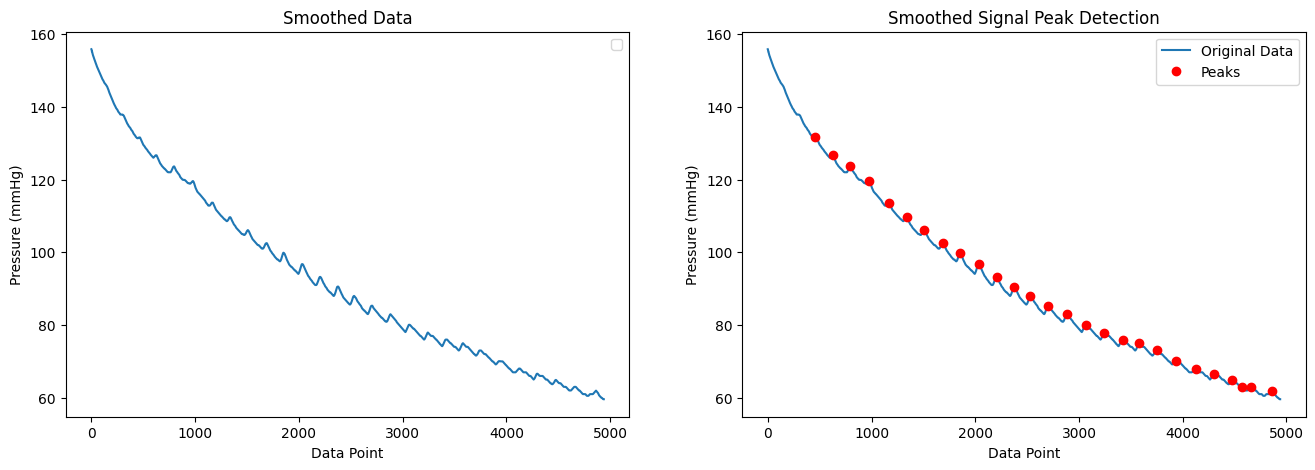

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt, hilbert
from scipy.optimize import curve_fit

deflation_values = [156,156,161,154,162,154,156,159,156,157,156,157,156,156,156,156,156,155,155,155,155,155,155,155,155,155,154,154,154,154,154,154,154,154,154,154,154,154,153,153,153,153,153,153,153,153,153,153,153,153,153,152,152,152,152,152,152,152,152,152,152,152,152,151,151,151,151,151,151,151,151,151,151,151,151,150,151,150,150,150,150,150,150,150,150,150,150,150,150,150,150,149,149,149,149,149,149,149,149,149,149,149,149,149,149,148,149,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,145,145,145,145,145,145,145,145,145,144,144,144,144,144,144,144,144,144,144,144,144,144,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,142,142,142,142,142,142,142,142,142,142,142,142,142,141,141,141,141,141,141,141,141,141,141,141,141,141,140,140,141,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,138,139,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,137,137,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,137,137,137,137,137,137,137,137,137,137,137,136,137,136,136,136,136,136,136,136,136,136,136,136,136,136,135,135,136,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,127,127,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,126,126,126,126,126,126,126,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,125,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,123,123,123,123,123,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,120,120,121,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,120,120,119,120,120,120,120,120,120,120,120,119,120,120,120,120,120,120,120,120,120,120,119,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,118,118,118,119,118,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,118,118,118,118,118,118,118,118,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,112,113,113,113,113,113,112,113,113,112,113,112,112,113,113,113,113,113,113,113,113,113,113,113,113,113,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,111,111,111,112,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,110,109,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,109,109,109,109,109,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,108,107,108,107,107,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,105,104,104,104,104,105,105,104,104,105,105,105,105,105,105,105,106,106,106,106,106,106,106,106,106,106,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,102,102,102,102,102,101,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,102,102,102,102,102,102,102,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,98,98,98,98,98,99,99,99,99,99,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,96,96,96,96,96,96,96,96,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,92,92,92,92,93,93,93,93,93,93,93,93,93,93,93,94,93,94,94,94,94,94,93,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,89,89,89,89,89,90,90,90,90,90,90,90,91,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,86,86,86,86,86,87,87,87,87,87,87,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,84,84,84,84,85,85,85,85,85,85,85,85,85,86,86,85,86,86,86,85,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,81,81,81,81,81,81,81,82,82,82,82,82,82,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,80,80,81,80,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,74,74,74,74,74,74,74,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,71,71,71,71,72,72,72,72,72,72,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,70,70,70,70,70,70,70,71,70,70,70,70,70,70,70,70,70,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,68,68,68,68,68,68,68,68,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,66,66,66,66,66,66,66,66,67,66,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,65,64,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,65,65,65,65,64,65,64,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,63,62,62,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,60,60,60,60,60,60,60]

# deflation_values = [130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,125,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,125,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,121,121,121,120,121,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,116,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,115,114,114,114,115,114,114,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,111,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,96,96,96,96,96,96,96,96,96,96,96,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,93,92,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,93,93,93,93,93,93,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,89,89,89,89,89,89,89,89,90,89,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,85,85,85,85,85,85,85,85,85,86,86,86,86,86,86,86,86,86,86,87,86,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,82,82,82,82,82,82,82,83,83,83,83,83,83,83,83,83,83,83,83,83,84,84,84,83,83,83,83,83,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,76,76,76,76,76,76,75,76,76,76,76,76,76,76,77,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,74,74,74,74,74,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,72,72,72,72,72,72,72,72,72,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,72,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,69,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,64,63,63,64,64,64,64,64,64,64,64,64,64,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,64,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,62,61,62,61,61,61,61,61,61,61,61,61,61,61,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,61,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,60,60,60,60,60,60,60,60,60,60,60,61,60,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,60,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,59,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,57,58,57,58,58,58,58,58,58,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,56,56,55,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,54,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,53,53,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,54,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,52,52,52,52,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,51,52,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,50,51,51,50,50,50,51,50,51,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,50,50,51,51,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,49,50,50,50,49,49,49,49,49,49,49,49,49,49,49,49,49]

# Moving Average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example usage:
# Replace the following data with your own signal

# Set the window size for the moving average
window_size = 30  # Adjust based on the desired smoothing level

# Apply moving average
smoothed_deflation_signal = moving_average(deflation_values, window_size)

# Set the threshold for peak detection
threshold = 3.0  # Adjust based on the characteristics of your data

deflation_pressure_data = smoothed_deflation_signal

# Find peaks in the data
peaks, _ = find_peaks(deflation_pressure_data, height=threshold)

print(deflation_pressure_data[peaks])

#Plot Results
plt.figure(figsize=(16,5))

# # Plot the values
# plt.subplot(1,3,1)
# plt.plot(values)
# plt.xlabel('Data Point')
# plt.ylabel('Pressure (mmHg)')
# plt.title('Raw Pressure Data')

# #values_trunc = values[:4800]

# Plot the results
plt.subplot(1,2,1)
plt.plot(deflation_pressure_data)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data")
plt.legend()

plt.subplot(1,2,2)
plt.plot(deflation_pressure_data, label='Original Data')
plt.plot(peaks, deflation_pressure_data[peaks], 'ro', label='Peaks')
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Signal Peak Detection")
plt.legend()
plt.show()

/var/folders/wt/kl_76stx4v518p8qmh9l0zk40000gn/T/ipykernel_14856/1871301765.py:39: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Baseline: -0.13511201027597017
[1.55719423 1.51349668 1.47053834 ... 0.50033268 0.47802352 0.45639996]
[  25.   26.   27. ... 4913. 4914. 4915.]
Maximum Indices Raw: [   0.  150.  312.  472.  631.  802.  981. 1170. 1341. 1350. 1513. 1691.
 1859. 2038. 2210. 2380. 2538. 2550. 2708. 2890. 3070. 3250. 3426. 3586.
 3749. 3753. 3953. 4129. 4305. 4482. 4500. 4665.]
Max Pressures: [155.83333333 145.66666667 137.53333333 131.36666667 126.5
 123.4        119.53333333 113.63333333 109.56666667 109.03333333
 105.96666667 102.5         99.7         96.66666667  93.13333333
  90.53333333  87.83333333  87.43333333  85.3         82.73333333
  80.03333333  77.73333333  76.          74.86666667  73.
  73.          70.          68.          66.5         64.8
  64.2         63.        ]
MAP: 155.83333333333331 mmHg


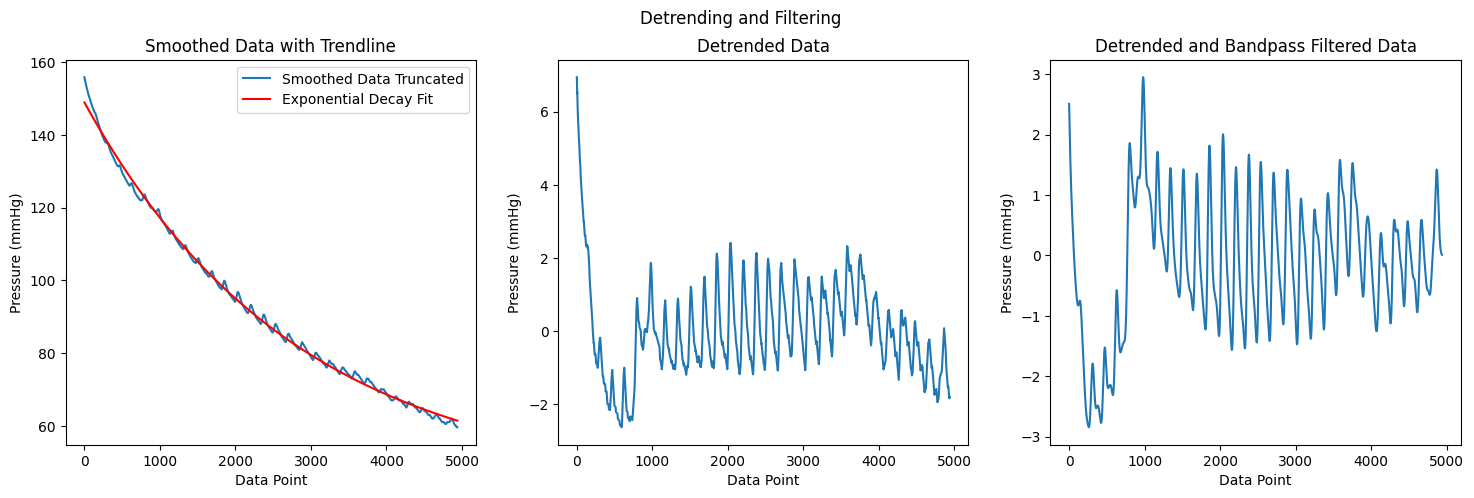

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


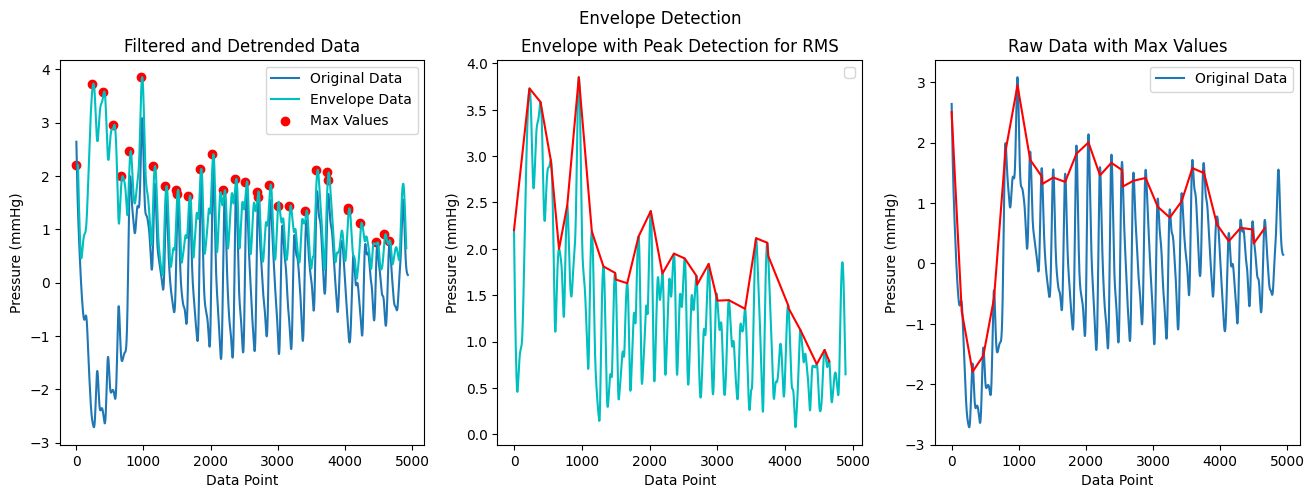

In [2]:
#attempt oscillometric data processing
# High-pass filter parameters
#order = 4  # Filter order
#cutoff_frequency = 0.2  # Cutoff frequency in Hz

# Design Butterworth high-pass filter
#b, a = butter(order, cutoff_frequency, btype='high', analog=False, fs=1.0)

# Apply the filter to the data
#filtered_data = filtfilt(b, a, deflation_pressure_data)

#Try bandpass filter instead
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Example usage:
# Generate example data
fs = 1000  # Sampling frequency

# Bandpass filter parameters
lowcut = 0.5
highcut = 18 #I think this is in Hz

# Apply bandpass filter
filtered_data = butter_bandpass_filter(deflation_pressure_data, lowcut, highcut, fs, order=4)

#Detrending using line of best fit
# Define the exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

x_vals = np.linspace(0, len(deflation_pressure_data), len(deflation_pressure_data))

# Perform curve fitting
params, covariance = curve_fit(exponential_decay, x_vals, deflation_pressure_data)

# Extract the fitted parameters
a, b, c = params

# Create the fitted curve
fitted_curve = exponential_decay(x_vals, a, b, c)

detrended_deflation_values = deflation_pressure_data - fitted_curve

filtered_data_detrended = butter_bandpass_filter(detrended_deflation_values, lowcut, highcut, fs, order=4)

#Envelope Calculations
baseline_data = np.mean(filtered_data_detrended)

print("Baseline:", baseline_data)

filtered_data_detrended_offset = filtered_data_detrended - baseline_data #Offset filtered and detrended data with baseline (mean)

#RMS Calculation
def calculate_rms_with_overlap(data, window_size, overlap):
    step_size = window_size - overlap
    num_windows = (len(data) - window_size) // step_size + 1

    # Initialize an array to store the RMS values
    rms_values = np.zeros(num_windows)
    indices = []
    rms = []

    # Calculate RMS for each window with overlap
    for i in range(num_windows):
        window_start = i * step_size
        window_end = window_start + window_size
        window_data = data[window_start:window_end]
        rms_values[i] = np.sqrt(np.mean(window_data**2))

        rms.append(rms_values[i])
        indices.append(((window_end-window_start)/2)+i)

    return rms_values, np.array(indices), np.array(rms)

# Example usage
window_size = 50
overlap = 49  # Adjust overlap as needed

rms_values, indices, rms = calculate_rms_with_overlap(filtered_data_detrended_offset, window_size, overlap)

print(rms)
print(indices)

envelope = rms*np.sqrt(2.0)

#Peak Detection Again
def find_max_in_blocks(data, block_size):
    num_blocks = len(data) // block_size

    # Initialize an array to store the maximum values
    max_values = np.zeros(num_blocks)
    max_indices = np.zeros(num_blocks)

    # Find the maximum value in each block
    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = data[block_start:block_end]
        max_values[i] = np.max(block_data)
        max_index_in_block = np.argmax(block_data)
        max_indices[i] = block_start + max_index_in_block

    return max_values, max_indices

def find_troughs_in_blocks(data, block_size):
    num_blocks = len(data) // block_size

    # Initialize an array to store the maximum values
    min_values = np.zeros(num_blocks)
    min_indices = np.zeros(num_blocks)

    # Find the maximum value in each block
    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = data[block_start:block_end]
        min_values[i] = np.min(block_data)
        min_index_in_block = np.argmin(block_data)
        min_indices[i] = block_start + min_index_in_block

    return min_values, min_indices

block_size = 150 # Adjust block size as needed

max_values_rms, max_indices_rms = find_max_in_blocks(envelope, block_size)
max_values_raw, max_indices_raw = find_max_in_blocks(filtered_data_detrended, block_size)
min_values_raw, min_indices_raw = find_troughs_in_blocks(filtered_data_detrended, block_size)

peaktopeak_values = max_values_raw - min_values_raw

max_pressures = np.zeros(len(max_values_raw))

for i in range(len(max_indices_raw)):
    current_index = int(max_indices_raw[i])
    max_pressures[i] = deflation_pressure_data[current_index] #we'll have to fix this later. The indexing for the algorithm stuff isn't what we expect. Need to clarify where the data should be truncated, what portion should be smoothed/filtered, etc.

print("Maximum Indices Raw:", max_indices_raw)
print("Max Pressures:", max_pressures)

map = np.max(max_pressures)

print("MAP:", map, "mmHg")

#Plot Raw Data and Detrending
plt.figure(figsize=(18,5))
plt.suptitle("Detrending and Filtering")

plt.subplot(1,3,1)
plt.plot(deflation_pressure_data, label='Smoothed Data Truncated')
plt.plot(x_vals, fitted_curve, color='red', label='Exponential Decay Fit')
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data with Trendline")
plt.legend()

plt.subplot(1,3,2)
plt.plot(detrended_deflation_values)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Detrended Data")

plt.subplot(1,3,3)
plt.plot(filtered_data_detrended)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Detrended and Bandpass Filtered Data")
plt.show()

#Plot Filtering and Envelope Detection
plt.figure(figsize=(16,5))
plt.suptitle("Envelope Detection")

plt.subplot(1,3,1)
plt.plot(filtered_data_detrended_offset, label='Original Data')
plt.plot(indices, envelope, color='c', label = "Envelope Data")
plt.scatter(max_indices_rms, max_values_rms, color="r", label = "Max Values")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Filtered and Detrended Data")
plt.legend()

plt.subplot(1,3,2)
plt.plot(envelope, color="c")
plt.plot(max_indices_rms, max_values_rms, color="r")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Envelope with Peak Detection for RMS")
plt.legend()

plt.subplot(1,3,3)
plt.plot(filtered_data_detrended_offset, label='Original Data')
plt.plot(max_indices_raw, max_values_raw, color="r")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Raw Data with Max Values")
plt.legend()

plt.show()

max_indices_round = np.zeros(len(max_indices_raw))

for i in range(len(max_indices_raw)):
    max_indices_round[i] = int(max_indices_raw[i])


MAP: 119.53333333333336 mmHg
Systolic: 119.53333333333336 mmHg
Diastolic: 93.1333333333333 mmHg


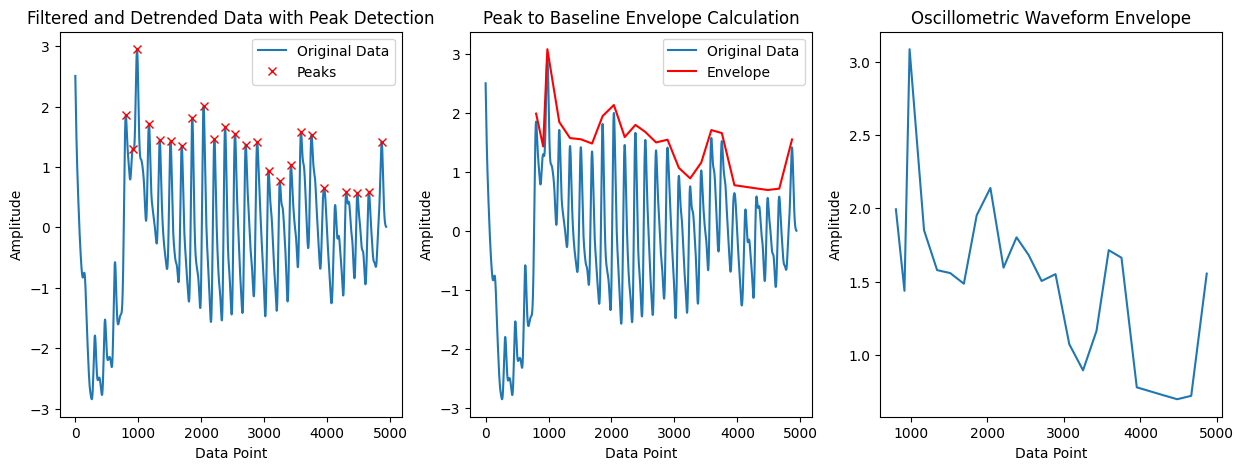

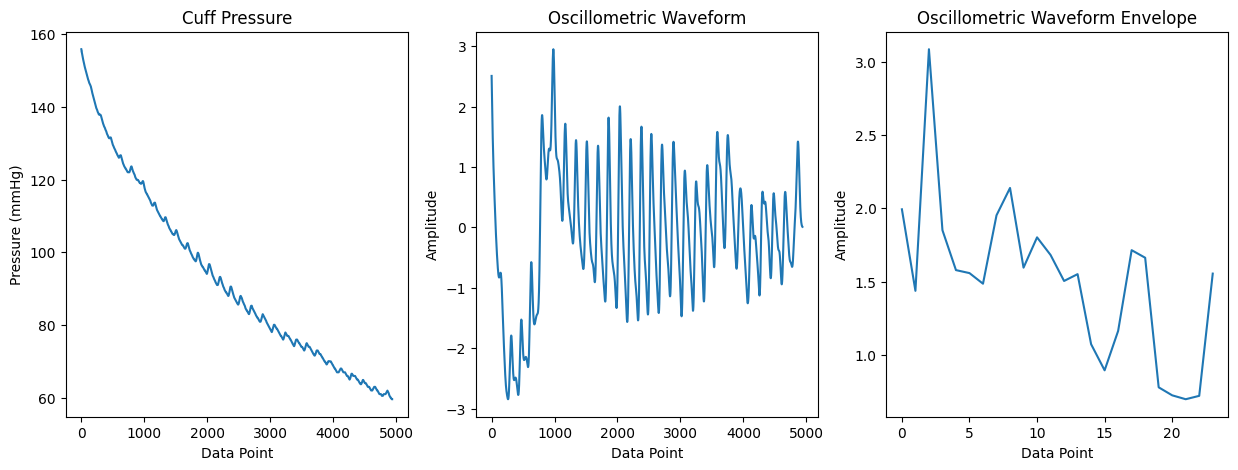

In [3]:
#Find peaks of oscillometric waveform
peaks, _ = find_peaks(filtered_data_detrended, height=0.5)  # Adjust height parameter based on your data

peaktobaseline = filtered_data_detrended[peaks] - baseline_data
x = np.linspace(0, len(filtered_data_detrended), len(filtered_data_detrended))

max_value = np.max(filtered_data_detrended[peaks])
max_index = np.argmax(filtered_data_detrended[peaks])
pressure_index = peaks[max_index]

map = deflation_pressure_data[pressure_index]
print("MAP:", map, "mmHg")

#Find systolic and diastolic from MAP
rs = 0.45 #Literature ratios
rd = 0.69 #Literature ratios

diastolic_value = rd*max_value
systolic_value = rs*max_value

#systolic: 0.9454393640984363 index 2
#diastolic: 1.4496736916176023 index 9

systolic_index = peaks[2]
diastolic_index = peaks[9]

systolic = deflation_pressure_data[systolic_index]
diastolic = deflation_pressure_data[diastolic_index]

print("Systolic:", systolic, "mmHg")
print("Diastolic:", diastolic, "mmHg")

# Plot the original data and highlight peaks
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(filtered_data_detrended, label='Original Data')
plt.plot(x[peaks], filtered_data_detrended[peaks], 'rx', label='Peaks')
plt.xlabel('Data Point')
plt.ylabel('Amplitude')
plt.title("Filtered and Detrended Data with Peak Detection")
plt.legend()

plt.subplot(1,3,2)
plt.plot(filtered_data_detrended, label='Original Data')
plt.plot(x[peaks], peaktobaseline, color = "r", label = "Envelope")
plt.xlabel('Data Point')
plt.ylabel('Amplitude')
plt.title("Peak to Baseline Envelope Calculation")
plt.legend()

plt.subplot(1,3,3)
plt.plot(x[peaks], peaktobaseline)
plt.xlabel('Data Point')
plt.ylabel('Amplitude')
plt.title("Oscillometric Waveform Envelope")
plt.show()

#Plot for deliverables
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(deflation_pressure_data)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Cuff Pressure")

plt.subplot(1,3,2)
plt.plot(filtered_data_detrended)
plt.xlabel('Data Point')
plt.ylabel('Amplitude')
plt.title("Oscillometric Waveform")

plt.subplot(1,3,3)
plt.plot(peaktobaseline)
plt.xlabel('Data Point')
plt.ylabel('Amplitude')
plt.title("Oscillometric Waveform Envelope")
plt.show()